<a href="https://colab.research.google.com/github/jatbhoir/Titanic-Machine-Learning/blob/master/Titanic_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# *Titanic: Machine Learning from Disaster*
---
1. Source: [Titanic-Machine Learning from Disaster](https://www.kaggle.com/competitions/titanic/data).
2. Problem Definition: The problem is to predict whether a passenger survived the Titanic disaster based on various features
   * age,
   * gender,
   * ticket class,
   * fare, etc.
3. Design Architecture: A simple Logistic Regression model and later might explore other algorithms.
---

Import Requried Packages

In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings("ignore")

In [52]:
# Linking Google Drive
# from google.colab import drive
# drive.mount('/content/drive')

Read CSV

In [67]:
# Load the dataset
train_data = pd.read_csv('/content/drive/MyDrive/Classroom/SEM2/ML/train.csv')
test_data = pd.read_csv('/content/drive/MyDrive/Classroom/SEM2/ML/test.csv')

# Combine train and test datasets for preprocessing
# data = pd.concat([train_data, test_data])

Explorartory Analysis

In [69]:
print(f'Train Shape: {train_data.shape}, \nTest Shape: {test_data.shape}') #, \nData Shape: {data.shape}')

Train Shape: (891, 12), 
Test Shape: (418, 11)


In [72]:
train_data.info(), test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass  

(None, None)

Preprocessing

In [73]:
# Checking for missing values
train_data.isnull().any(), test_data.isnull().any()

(PassengerId    False
 Survived       False
 Pclass         False
 Name           False
 Sex            False
 Age             True
 SibSp          False
 Parch          False
 Ticket         False
 Fare           False
 Cabin           True
 Embarked        True
 dtype: bool,
 PassengerId    False
 Pclass         False
 Name           False
 Sex            False
 Age             True
 SibSp          False
 Parch          False
 Ticket         False
 Fare            True
 Cabin           True
 Embarked       False
 dtype: bool)

In [75]:
# Handling missing values
# train
train_data['Age'].fillna(data['Age'].mean(), inplace = True)
train_data['Fare'].fillna(data['Fare'].median(), inplace = True)
# test
test_data['Age'].fillna(data['Age'].mean(), inplace = True)
test_data['Fare'].fillna(data['Fare'].median(), inplace = True)

In [76]:
# Converting Categorical data
train_data['Sex'].replace(['female', 'male'], [0, 1], inplace = True)
test_data['Sex'].replace(['female', 'male'], [0, 1], inplace = True)

In [ ]:
# Droping columns
train_data.drop(columns = ['Name', 'Ticket', 'Cabin', 'Embarked'], inplace = True)
test_data.drop(columns = ['Name', 'Ticket', 'Cabin', 'Embarked'], inplace = True)

In [79]:
train_data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,1,22.000000,1,0,7.2500
1,2,1,1,0,38.000000,1,0,71.2833
2,3,1,3,0,26.000000,0,0,7.9250
3,4,1,1,0,35.000000,1,0,53.1000
4,5,0,3,1,35.000000,0,0,8.0500
...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.000000,0,0,13.0000
887,888,1,1,0,19.000000,0,0,30.0000
888,889,0,3,0,29.881138,1,2,23.4500
889,890,1,1,1,26.000000,0,0,30.0000


In [80]:
test_data

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare
0,892,3,1,34.500000,0,0,7.8292
1,893,3,0,47.000000,1,0,7.0000
2,894,2,1,62.000000,0,0,9.6875
3,895,3,1,27.000000,0,0,8.6625
4,896,3,0,22.000000,1,1,12.2875
...,...,...,...,...,...,...,...
413,1305,3,1,29.881138,0,0,8.0500
414,1306,1,0,39.000000,0,0,108.9000
415,1307,3,1,38.500000,0,0,7.2500
416,1308,3,1,29.881138,0,0,8.0500


Create X & Y

In [81]:
x = train_data.drop(columns = 'Survived')
y = train_data['Survived']

Checking for Multicollinearity

<Axes: >

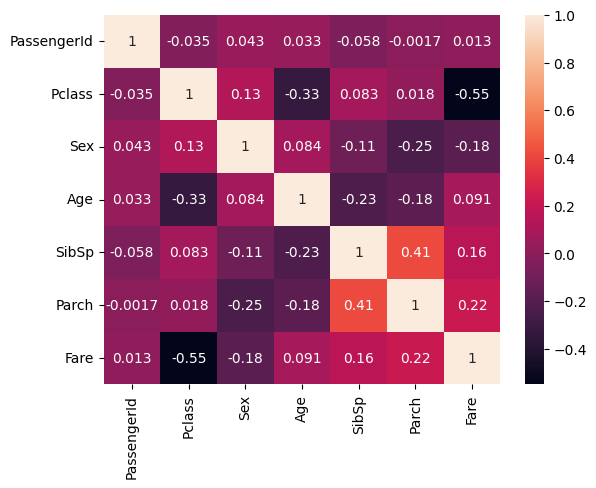

In [82]:
corr = x.corr(method = 'pearson')
sns.heatmap(data = corr, annot = True)

Train_Test Split

In [83]:
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state = None, test_size = .30)

In [84]:
print(f'x: {x.shape}, y:{y.shape}')
print(f'X_train: {X_train.shape}, y_train:{y_train.shape}')
print(f'X_test: {X_test.shape}, y_test:{y_test.shape}')

x: (891, 7), y:(891,)
X_train: (623, 7), y_train:(623,)
X_test: (268, 7), y_test:(268,)


Models

---

In [85]:
# Logistics Regression

LR = LogisticRegression()
LR.fit(X_train, y_train)

LogisticRegression()

In [87]:
y_pred = LR.predict(X_test)

In [90]:
# Evaluate the Model
R2_Score_LR = r2_score(y_test, y_pred)
print(f'R2 Score: {R2_Score_LR}')

R2 Score: 0.19277108433734935
